Import Library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

load model yang sudah dibuat

In [2]:
loaded_model = tf.keras.models.load_model('model.h5')

load data gambar yang akan di prediksi oleh model.

In [3]:
direc = Path('C:/Users/Administrator/Downloads/Inference M2P2')
filepaths = list(direc.glob(r'**/*.png'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))



filepaths = pd.Series(filepaths, name='Images').astype(str)
Labels = pd.Series(Labels, name='Labels').astype(str)


df = pd.merge(filepaths, Labels, right_index = True, left_index = True)

#Resampling it
pd.options.display.max_rows
df

,Images,Labels
0,C:\Users\Administrator\Downloads\Inference M2P...,Gilt Head Bream
1,C:\Users\Administrator\Downloads\Inference M2P...,Hourse Mackerel
2,C:\Users\Administrator\Downloads\Inference M2P...,Red Sea Bream
3,C:\Users\Administrator\Downloads\Inference M2P...,Sea Bass
4,C:\Users\Administrator\Downloads\Inference M2P...,Shrimp
5,C:\Users\Administrator\Downloads\Inference M2P...,Trout


In [4]:
print(df['Images'].values)

['C:\\Users\\Administrator\\Downloads\\Inference M2P2\\Gilt Head Bream\\Gilt_Head_Bream.png'
 'C:\\Users\\Administrator\\Downloads\\Inference M2P2\\Hourse Mackerel\\jurel-3.png'
 'C:\\Users\\Administrator\\Downloads\\Inference M2P2\\Red Sea Bream\\Red-Sea-Bream.png'
 'C:\\Users\\Administrator\\Downloads\\Inference M2P2\\Sea Bass\\seabass-whole-7-p.png'
 'C:\\Users\\Administrator\\Downloads\\Inference M2P2\\Shrimp\\shrimp.png'
 'C:\\Users\\Administrator\\Downloads\\Inference M2P2\\Trout\\trout.png']


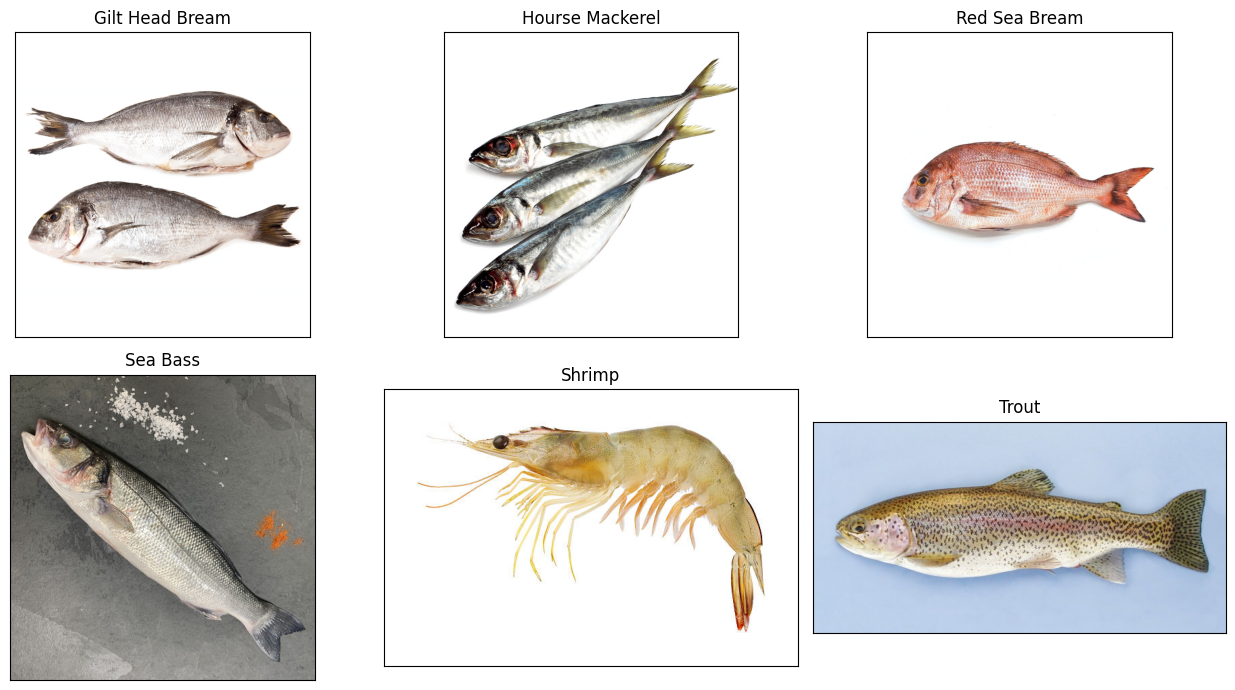

In [5]:
# Showing 9Images 
import matplotlib.pyplot as plt
f,a = plt.subplots(nrows=2, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Images[i]))
    ax.set_title(df.Labels[i])
    
plt.tight_layout()
plt.show()

In [6]:
labels = {'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [7]:
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'Black Sea Sprat',
 1: 'Gilt-Head Bream',
 2: 'Hourse Mackerel',
 3: 'Red Mullet',
 4: 'Red Sea Bream',
 5: 'Sea Bass',
 6: 'Shrimp',
 7: 'Striped Red Mullet',
 8: 'Trout'}

In [8]:
def predict(model, data):
    '''
    Fungsi untuk memprediksi kelas ikan
    '''
    target_size = (224,224)
    test_datagen = ImageDataGenerator(rescale = 1.0/255.)
    test_gen = test_datagen.flow_from_dataframe(df,
                                            target_size = target_size, x_col = 'Images', y_col ='Labels',
                                             class_mode = 'categorical',
                                            batch_size = 32, shuffle = False)
    predictions = model.predict(test_gen)
    preds = np.argmax(predictions, axis=1)
    prediction = [labels[k] for k in preds]
    print(preds)
    data['Labels'] = prediction
    return data

predict(loaded_model, df)

Found 6 validated image filenames belonging to 6 classes.
[5 5 4 5 6 8]


,Images,Labels
0,C:\Users\Administrator\Downloads\Inference M2P...,Sea Bass
1,C:\Users\Administrator\Downloads\Inference M2P...,Sea Bass
2,C:\Users\Administrator\Downloads\Inference M2P...,Red Sea Bream
3,C:\Users\Administrator\Downloads\Inference M2P...,Sea Bass
4,C:\Users\Administrator\Downloads\Inference M2P...,Shrimp
5,C:\Users\Administrator\Downloads\Inference M2P...,Trout


Kita melihat bahwa model berhasil memprediksi gambar dengan ikan tunggal, tetapi gagal dalam memprediksi gambar dengan jumlah ikan yang banyak. Hal ini dapat di-improve dengan berbagai metode yang dijelaskan pada model evaluation pada ipynb utama.